In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam


In [3]:
dataset_path=r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset"

In [4]:
files = os.listdir(dataset_path)

In [5]:
files

['altar',
 'apse',
 'bell_tower',
 'column',
 'dome(inner)',
 'dome(outer)',
 'flying_buttress',
 'gargoyle',
 'stained_glass',
 'vault']

In [6]:
file_tdrw=files

In [7]:
len(file_tdrw)

10

In [8]:
plt.figure(figsize = (len(file_tdrw)*3,len(file_tdrw)*4))

<Figure size 3000x4000 with 0 Axes>

<Figure size 3000x4000 with 0 Axes>

Skipping file (not an image or unreadable): C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset\apse\Ukmerge╠çs_S╠îv._Petro_ir_Povilo_baz╠înyc╠îia.jpg
Skipping file (not an image or unreadable): C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset\apse\EsglΓÇÜsia_St_Mart┬í_de_Rivert,_lateral_and_apse.jpg
Skipping file (not an image or unreadable): C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset\apse\90px-Argandoα╕äa_-_Santa_Columba_06.jpg
Skipping file (not an image or unreadable): C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\

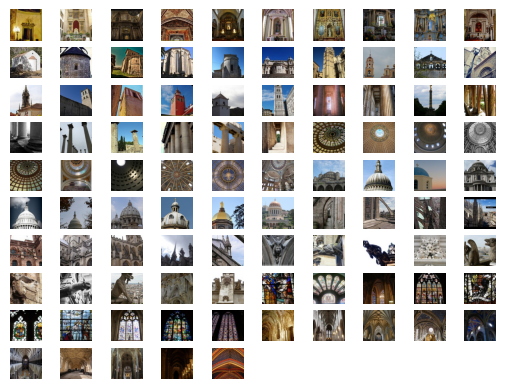

In [10]:
plot_index = 1

for class_name in file_tdrw:
    image_fldr = os.path.join(dataset_path, class_name)
    image_lst = os.listdir(image_fldr)

    img_sample = random.sample(image_lst, min(len(image_lst), 10))

    for img_name in img_sample:
        img_path = os.path.join(image_fldr, img_name)

        img = cv2.imread(img_path) # converts img to numpy array

        # 🔴 IMPORTANT CHECK
        if img is None:
            print(f"Skipping file (not an image or unreadable): {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converts the image color space from BGR → RGB

        plt.subplot(len(file_tdrw), 10, plot_index)
        plt.imshow(img_rgb)
        plt.axis("off")

        plot_index += 1


In [11]:
 cv2.imread(r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset\apse\04_Monasterio_de_Palazuelos_absides_exterior_ni.jpg").shape

(128, 128, 3)

In [12]:
# ResNet50 is a deep convolutional neural network with 50 layers trained on ImageNet data
conv_base = tf.keras.applications.ResNet50(weights = 'imagenet',include_top = False, input_shape=(224, 224, 3))  # Load the model with pre-trained ImageNet weights

In [13]:
model = Sequential()

# Base CNN (feature extractor)
model.add(conv_base)

# Pooling layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer
model.add(Dense(len(file_tdrw), activation='softmax'))

In [14]:
conv_base.trainable = False

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,115,850 (91.99 MB)

 Trainable params: 527,626 (2.01 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

In [18]:
TRAIN_DIR = r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset"   # change if required
TEST_DIR = r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures 2\dataset_hist_structures\Dataset_test\Dataset_test_original_1478"

In [19]:
# No augmentation as per Task 8
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
train_gen = train_datagen.flow_from_directory(TRAIN_DIR,target_size = (224,224)
                                              , batch_size = 32,class_mode ='categorical', shuffle = True)

Found 10210 images belonging to 10 classes.


In [21]:
test_gen = test_datagen.flow_from_directory(TEST_DIR,target_size = (224,224)
                                              , batch_size = 32,class_mode ='categorical', shuffle = True)

Found 1455 images belonging to 10 classes.


In [22]:
print("Number of training samples:", train_gen.samples)
print("Number of testing samples:", test_gen.samples)
print("Classes:", train_gen.class_indices)
num_classes = train_gen.num_classes

Number of training samples: 10210
Number of testing samples: 1455
Classes: {'altar': 0, 'apse': 1, 'bell_tower': 2, 'column': 3, 'dome(inner)': 4, 'dome(outer)': 5, 'flying_buttress': 6, 'gargoyle': 7, 'stained_glass': 8, 'vault': 9}


In [23]:
model.compile(optimizer = Adam(learning_rate=1e-4), loss ='categorical_crossentropy', metrics=['accuracy'])

In [24]:
class EarlyStopByAccuracy(Callback):
    def __init__(self, threshold=0.90):
        super(EarlyStopByAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.threshold:
            print(f"\nStopping training as val_accuracy reached {val_acc:.2f}")
            self.model.stop_training = True

early_stop_callback = EarlyStopByAccuracy(threshold=0.92)

In [25]:
history_=model.fit(train_gen,
          epochs = 20,
          validation_data = test_gen,
          callbacks = [early_stop_callback])

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.8211 - loss: 0.5603 - val_accuracy: 0.9113 - val_loss: 0.3115
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9434 - loss: 0.1851 - val_accuracy: 0.9141 - val_loss: 0.2732
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 0.9550 - loss: 0.1409
Stopping training as val_accuracy reached 0.92
320/320 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9558 - loss: 0.1393 - val_accuracy: 0.9216 - val_loss: 0.2619


In [26]:
train_datagen_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [27]:
train_gen_aug = train_datagen_aug.flow_from_directory(TRAIN_DIR,target_size = (224,224)
                                              , batch_size = 32,class_mode ='categorical', shuffle = True)

Found 10210 images belonging to 10 classes.


In [28]:
test_gen_aug = test_datagen_aug.flow_from_directory(TEST_DIR,target_size = (224,224)
                                               ,batch_size = 32,class_mode ='categorical', shuffle = True)

Found 1455 images belonging to 10 classes.


In [29]:
model_aug = Sequential()

# Base CNN (feature extractor)
model_aug.add(conv_base)

# Pooling layer to reduce spatial dimensions
model_aug.add(GlobalAveragePooling2D())
model_aug.add(Dense(256, activation='relu'))
model_aug.add(BatchNormalization())
model_aug.add(Dropout(0.4))

# Output layer
model_aug.add(Dense(len(file_tdrw), activation='softmax'))

In [30]:
model_aug.compile(optimizer = Adam(learning_rate=1e-4), loss ='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model_aug.fit(train_gen_aug,
          epochs = 20,
          validation_data = test_gen_aug,
          callbacks = [early_stop_callback])

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.8056 - loss: 0.6238 - val_accuracy: 0.8880 - val_loss: 0.3093
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.9292 - loss: 0.2263 - val_accuracy: 0.8983 - val_loss: 0.2934
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.9418 - loss: 0.1857 - val_accuracy: 0.9107 - val_loss: 0.2768
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9523 - loss: 0.1490
Stopping training as val_accuracy reached 0.92
320/320 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.9516 - loss: 0.1523 - val_accuracy: 0.9223 - val_loss: 0.2439


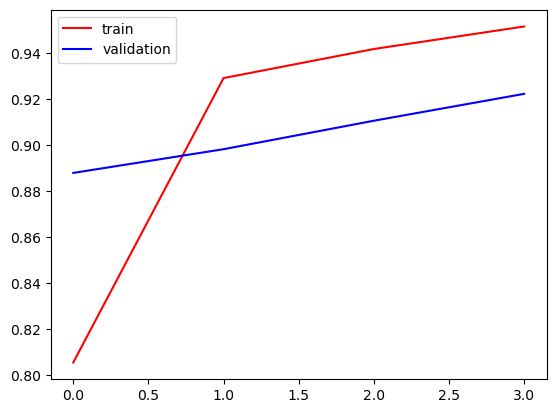

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Part 2 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import pandas as pd

users = pd.read_csv(r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 2\user.csv")
places = pd.read_excel(r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 2\tourism_with_id.xlsx")
ratings = pd.read_csv(r"C:\Users\Mohitsharma5\Documents\ML\Capstone project\Datasets (2)\Capstone 2\Part 2\tourism_rating.csv")

def inspect(df, name):
    print(f"\n{name}")
    print("Shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    print("Duplicates:", df.duplicated().sum())

inspect(users, "Users")
inspect(places, "Places")
inspect(ratings, "Ratings")


Users
Shape: (300, 3)
Missing values:
 User_Id     0
Location    0
Age         0
dtype: int64
Duplicates: 0

Places
Shape: (437, 13)
Missing values:
 Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64
Duplicates: 0

Ratings
Shape: (10000, 3)
Missing values:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64
Duplicates: 79


In [59]:
ratings.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')

In [46]:
users.drop_duplicates(inplace=True)
places.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

# Ensure rating range is valid
ratings = ratings[(ratings["Place_Ratings"] >= 1) & (ratings["Place_Ratings"] <= 5)]


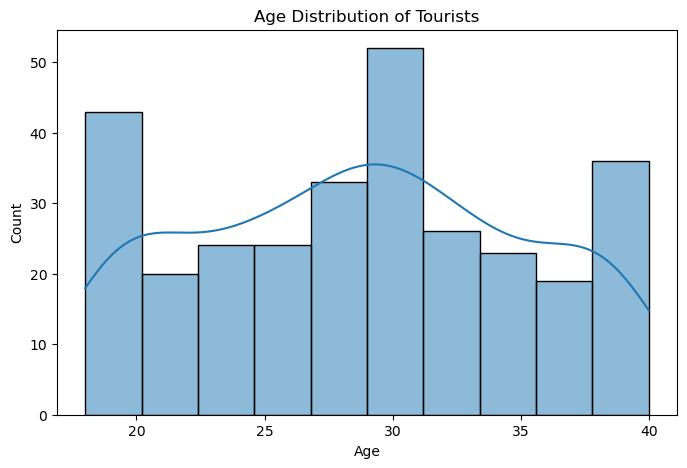

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(users["Age"], bins=10, kde=True)
plt.title("Age Distribution of Tourists")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Most users providing ratings belong to the 18–40 age group, indicating tourism interest is higher among young and middle-aged adults.

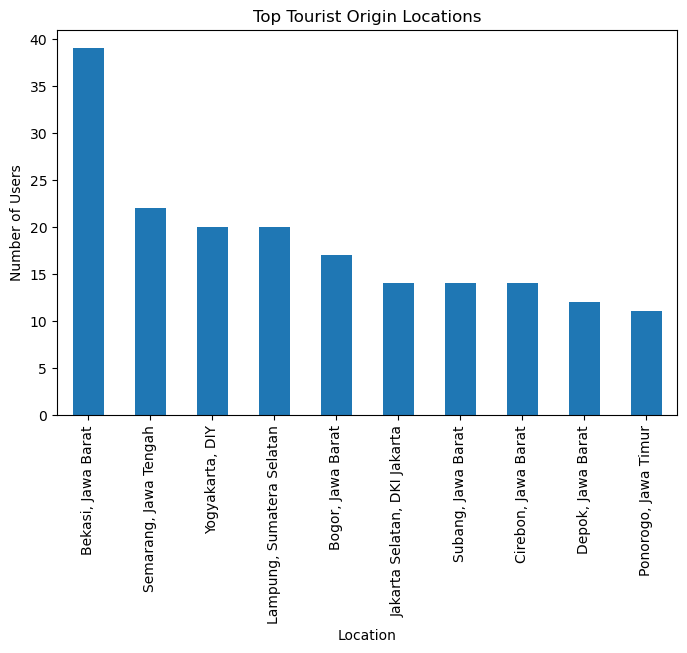

In [54]:
# Where tourists are coming from
plt.figure(figsize=(8,5))
users["Location"].value_counts().head(10).plot(kind="bar")
plt.title("Top Tourist Origin Locations")
plt.ylabel("Number of Users")
plt.show()


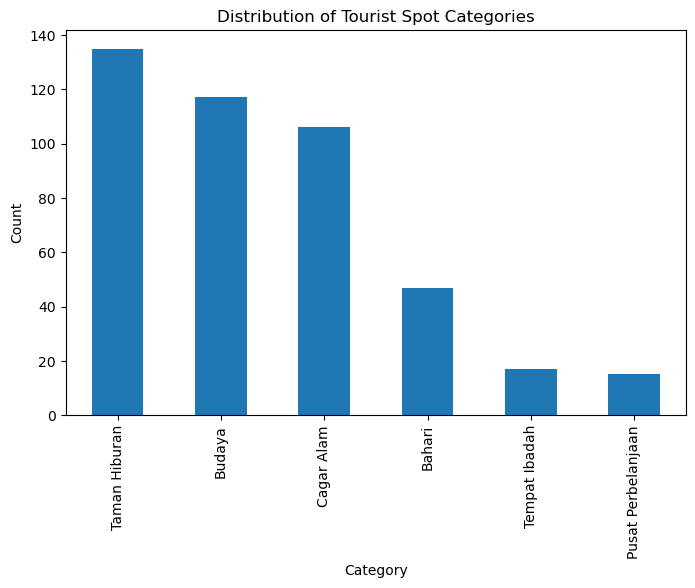

In [55]:
#3.I Different categories of tourist spots
plt.figure(figsize=(8,5))
places["Category"].value_counts().plot(kind="bar")
plt.title("Distribution of Tourist Spot Categories")
plt.ylabel("Count")
plt.show()

In [56]:
# 3.II Tourism type each city is famous for
city_category = pd.crosstab(places["City"], places["Category"])
city_category

Category,Bahari,Budaya,Cagar Alam,Pusat Perbelanjaan,Taman Hiburan,Tempat Ibadah
City,,,,,,
Bandung,0,22,54,1,39,8
Jakarta,8,32,4,10,27,3
Semarang,4,15,20,0,15,3
Surabaya,1,18,5,1,18,3
Yogyakarta,34,30,23,3,36,0


In [57]:
# 3.III Best city for a nature enthusiast
nature_places = places[places["Category"].str.contains("Alam|Nature", case=False, na=False)]
nature_places["City"].value_counts()

City
Bandung       54
Yogyakarta    23
Semarang      20
Surabaya       5
Jakarta        4
Name: count, dtype: int64

In [61]:
combined = ratings.merge(places, on="Place_Id", how="left")


In [65]:
# Most loved tourist spots
top_places = combined.groupby("Place_Name")["Place_Ratings"].mean().sort_values(ascending=False)
top_places.head(10)

Place_Name
Keraton Surabaya                         3.933333
Puncak Gunung Api Purba - Nglanggeran    3.882353
Kampung Cina                             3.842105
Bukit Jamur                              3.793103
Teras Cikapundung BBWS                   3.789474
Bukit Bintang Yogyakarta                 3.764706
Monumen Yogya Kembali                    3.761905
Glamping Lakeside Rancabali              3.750000
Monumen Nasional                         3.722222
Pantai Baron                             3.695652
Name: Place_Ratings, dtype: float64

In [67]:
# City with most loved spots
top_cities = combined.groupby("City")["Place_Ratings"].mean().sort_values(ascending=False)
top_cities

City
Yogyakarta    3.104986
Bandung       3.079022
Surabaya      3.078035
Semarang      3.035850
Jakarta       3.007361
Name: Place_Ratings, dtype: float64

In [69]:
combined.groupby("Category")["Place_Ratings"].mean().sort_values(ascending=False)


Category
Taman Hiburan         3.118386
Tempat Ibadah         3.086387
Cagar Alam            3.081352
Budaya                3.032270
Bahari                3.011194
Pusat Perbelanjaan    2.947507
Name: Place_Ratings, dtype: float64

Users rate cultural and marine tourism categories higher than other categories.

In [72]:
user_item_matrix = combined.pivot_table(
    index="User_Id",
    columns="Place_Name",
    values="Place_Ratings"
)


In [73]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = pd.DataFrame(
    cosine_similarity(user_item_matrix.fillna(0).T),
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)


In [74]:
def recommend_places(place_name, top_n=5):
    if place_name not in item_similarity.columns:
        return "Place not found in dataset"

    scores = item_similarity[place_name].sort_values(ascending=False)
    return scores.iloc[1:top_n+1]


In [75]:
recommend_places("Monumen Nasional")


Place_Name
Wisata Mangrove Tapak       0.268835
Danau Rawa Pening           0.262729
Museum Sonobudoyo Unit I    0.260171
Dunia Fantasi               0.252406
Situ Patenggang             0.241168
Name: Monumen Nasional, dtype: float64